# World Hapiness Explanatory Data Analysis

### Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

## What wil you learn from this project?
* Bivariate data analysis
* Multivariate data analysis
* Seaborn library visualization techniques: bar, box, kde, swarm, heatmap, clustermap
* Plotly library visualization techniqus: animated plot and world map

## Introduction 
* The World Hapiness Report is a landmark survey of the state of global hapiness.
* The report continues to gain global recognition as governments, organizations and civil society increasingly use hapiness indicators to inform their policy - making decisions.
* Leading experts across fields - economics, psychology, survey analysis, national statistics, healt, public policy and more - describe how measurements of well-being can be used effectively to asses the progress of nations.
* The reports review the state of hapiness in the world today and show how the new science of hapiness explains personal and national variations in hapiness.


## Analysis Content
 
1. [Python Libraries](#1) 
2. [Data Content](#2)
3. [Read and Analysis Data](#3)
4. [Data Distributions in 2021](#4)
5. [Happiest and Unhappiest Countries in 2021](#5)
6. [Ladder Score Distribution by Regional Indicator](#6)
7. [Ladder Score Distribution by Countries in Map View](#7)
8. [The Most Generous and Ungenerous in 2021](#8)
9. [Generous Distribution by Countries in Map View](#9)
10. [Generous Distribution by Regional Indicator in 2021](#10)
11. [Relationship Between Hapiness and Income](#11)
12. [Relationship Between Hapiness and Freedom](#12)
13. [Relationship Between Hapiness and Corruption](#13)
14. [Relationship Between Features](#14)
15. [Conclusion](#15)

<a id='1'></a>
## Python Libraries

* In this section, we import use libraries during this kernel.

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


<a id ='2' ></a>
## Data Content

* The hapiness scores and rankings use data from the Gallup World Poll.
    * Gallup World Poll: In 2005, Gallup began its. World Poll, whşch continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.
* The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.
* **Ladder score**: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
* **Logged GDP per capita**: The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
* **Social support**: Social support refers to assistance or support provided by members of social networks to an individual.
* **Healthy life expectancy**: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
* **Freedom to make life choices**: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
* **Generosity**: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
* **Perceptions of corruption**: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
* **Ladder score in Dystopia**: It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... * Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

* World Happiness Report Official Website: https://worldhappiness.report/

<a id = 3 ></a>
## Read and Analysis Data

In [71]:
# read data 

df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [72]:
#show first five row of data

df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [73]:
# describe basic statistics of data

df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [74]:
# information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [75]:
# read data

df2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")

In [76]:
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [77]:
df2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [78]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

### <a id = 4 ></a>
## Data Distributions in 2021

* Unique Countries
* Count Regional Indicator
* Distribution of Remaining Futures

In [79]:
df2021.columns 

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [80]:
# unique countries


df2021["Country name"].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

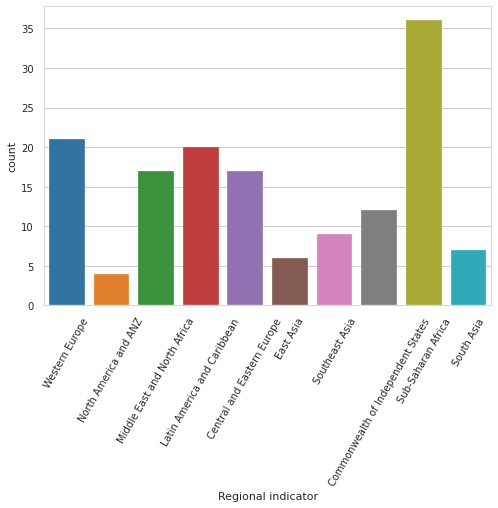

In [81]:
# count regional indicator

sns.countplot(df2021["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

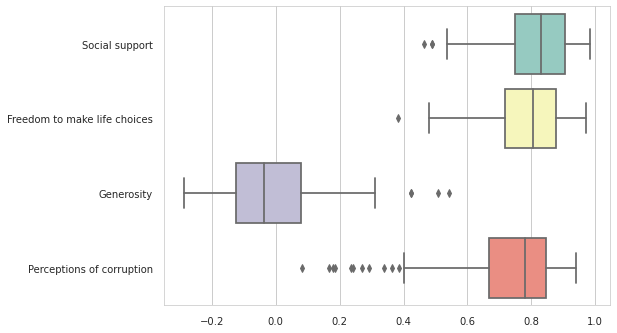

In [82]:
# distribution of feature set 1 

list_features = ["Social support","Freedom to make life choices","Generosity","Perceptions of corruption"]
sns.boxplot(data=df2021.loc[:,list_features], orient = "h", palette ="Set3")
plt.show()

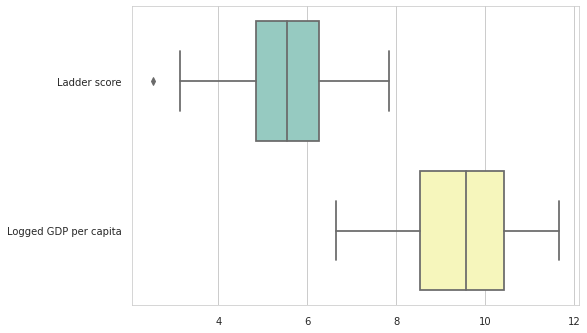

In [83]:
# distribution of feature set 2

list_features = ["Ladder score","Logged GDP per capita"]
sns.boxplot(data=df2021.loc[:,list_features], orient = "h", palette ="Set3")
plt.show()

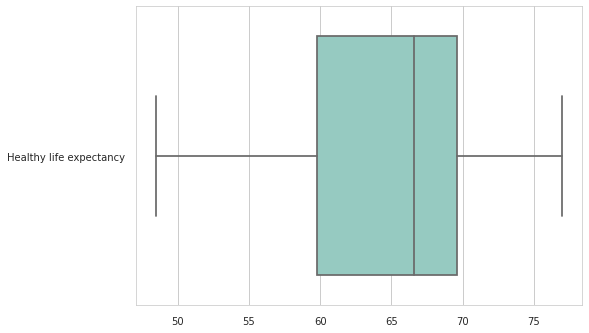

In [84]:
# distribution of feature set 3

list_features = ["Healthy life expectancy"]
sns.boxplot(data=df2021.loc[:,list_features], orient = "h", palette ="Set3")
plt.show()

<a id = 5></a>
## Happiest and Unhappiest Countries in 2021

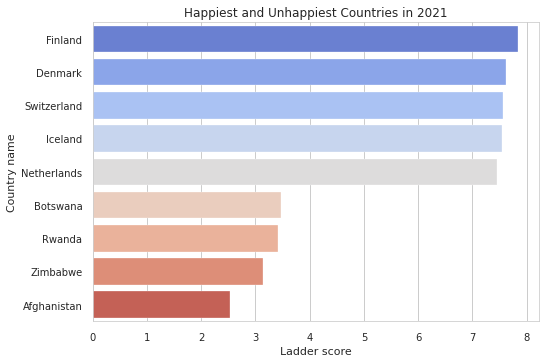

In [85]:
df2021_happiest_unhappiest=df2021[(df2021.loc[:,"Ladder score"] > 7.4 ) | (df2021.loc[:,"Ladder score"] < 3.5)]
sns.barplot(x="Ladder score", y="Country name", data=df2021_happiest_unhappiest, palette="coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

<a id = 6 ></a>
## Ladder Score Distribution by Regional Indicator

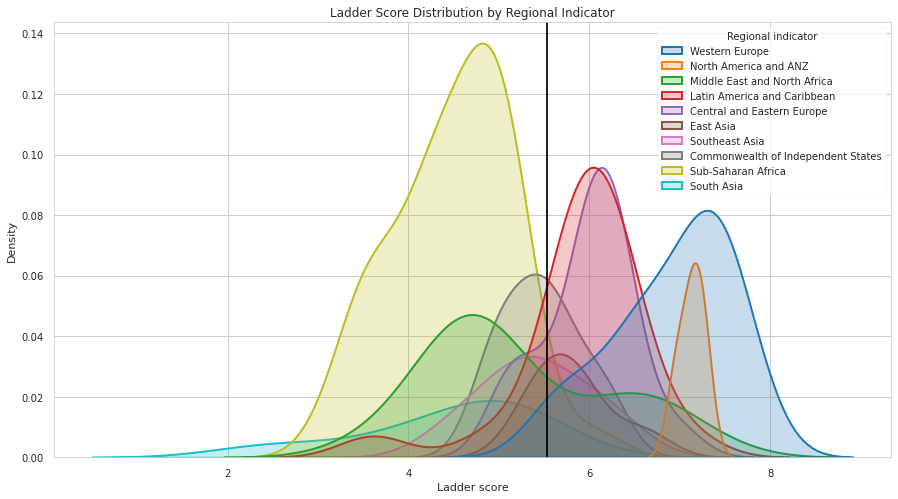

In [86]:
plt.figure(figsize=(15,8))
sns.kdeplot(df2021["Ladder score"],hue = df2021["Regional indicator"], fill =True, linewidth=2)
plt.axvline(df2021["Ladder score"].mean(), c ="black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

<a id = 7></a>
## Ladder Score Distribution by Countries in Map View

In [87]:
fig = px.choropleth(df.sort_values("year"), 
                    locations = "Country name",
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()

<a id = 8 ></a>
## The Most Generous and Ungenerous in 2021

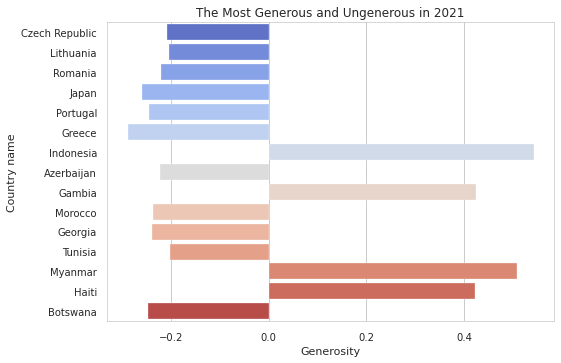

In [88]:
df2021_g = df2021[(df2021.loc[:,"Generosity"] > 0.4) | (df2021.loc[:, "Generosity"] < -0.2)]
sns.barplot(x = "Generosity", y="Country name", data = df2021_g , palette = "coolwarm" )
plt.title("The Most Generous and Ungenerous in 2021")
plt.show()

<a id = 9></a>
## Generous Distribution by Countries in Map View

In [89]:
fig = px.choropleth(df.sort_values("year"),
                    locations = "Country name",
                    color = "Generosity",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Generosity Comparison by Countries")
fig.show()

<a id = 10></a>
## Generous Distribution by Regional Indicator in 2021

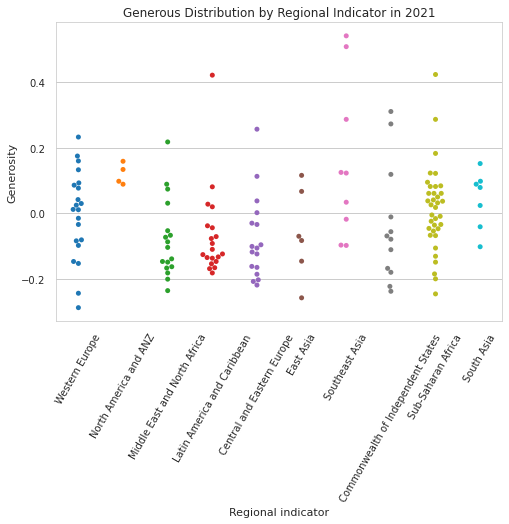

In [90]:
sns.swarmplot(x = "Regional indicator", y="Generosity", data = df2021)
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

<a id=11></a>
## Relationship Between Hapiness and Income

In [91]:
pop = pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [92]:
country_continent = {}
for i in range(len(df2021)):
    country_continent[df2021["Country name"][i]] = df2021["Regional indicator"][i]
    
all_countries = df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_2021 = df2021["Country name"].value_counts().reset_index()["index"].tolist()

for x in all_countries:
    if x not in all_countries_2021:
        print(x)

Congo (Kinshasa)
Syria
Trinidad and Tobago
Sudan
Qatar
Central African Republic
Somaliland region
Djibouti
South Sudan
Angola
Bhutan
Somalia
Belize
Suriname
Cuba
Oman
Guyana


In [93]:
region = []
for i in range(len(df)):
    if df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Congo (Kinshasa)':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'South Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[df['Country name'][i]])
        
df["region"] = region

In [94]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [95]:
all_countries = df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_pop = pop["Country Name"].value_counts().reset_index()["index"].tolist()

del_country = []
for x in all_countries:
    if x not in all_countries_pop:
        del_country.append(x)
del_country

['Egypt',
 'South Korea',
 'Kyrgyzstan',
 'Russia',
 'Venezuela',
 'Palestinian Territories',
 'Taiwan Province of China',
 'Iran',
 'Yemen',
 'Slovakia',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Laos',
 'Congo (Kinshasa)',
 'Syria',
 'North Cyprus',
 'Somaliland region',
 'Swaziland',
 'Gambia']

In [96]:
pop_df = df[["Log GDP per capita","Life Ladder","Country name","year","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","region"]].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,7.370,3.724,Afghanistan,2008,50.80,0.718,0.168,0.882,South Asia
1,7.540,4.402,Afghanistan,2009,51.20,0.679,0.190,0.850,South Asia
2,7.647,4.758,Afghanistan,2010,51.60,0.600,0.121,0.707,South Asia
3,7.620,3.832,Afghanistan,2011,51.92,0.496,0.162,0.731,South Asia
4,7.705,3.783,Afghanistan,2012,52.24,0.531,0.236,0.776,South Asia


In [97]:
pop_df=pop_df[~pop_df["Country name"].isin(del_country)]
pop_df = pop_df[~pop_df["year"].isin([2006,2005,2007,2018,2019,2020,2021])]
pop_dict = {x : {} for x in range(2008,2018)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008,2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]] = pop["Count"][i]

In [98]:
population = []
for i in pop_df.index:
    population.append(pop_dict[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["population"]= population

In [99]:
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,region,population
0,7.370,3.724,Afghanistan,2008,50.80,0.718,0.168,0.882,South Asia,27722276
1,7.540,4.402,Afghanistan,2009,51.20,0.679,0.190,0.850,South Asia,28394813
2,7.647,4.758,Afghanistan,2010,51.60,0.600,0.121,0.707,South Asia,29185507
3,7.620,3.832,Afghanistan,2011,51.92,0.496,0.162,0.731,South Asia,30117413
4,7.705,3.783,Afghanistan,2012,52.24,0.531,0.236,0.776,South Asia,31161376


In [100]:
fig = px.scatter(pop_df, 
                 x = "Log GDP per capita",
                 y = "Life Ladder",
                 animation_frame = "year",
                 size = "population",
                 template = "plotly_white",
                 color = "region",
                 hover_name = "Country name",
                 size_max=60)
fig.update_layout(title = "Life Ladder and Log GDP per capita Comparison by Countries via Regions for each Year" )

<a id = '12' ></a>
## Relationship Between Hapiness and Freedom

In [101]:
fig = px.scatter(pop_df, 
                 x = "Freedom to make life choices",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "population",
                 template = "plotly_dark",
                 color = "region",
                 hover_name = "Country name",
                 size_max=60)
fig.update_layout(title = "Life Ladder and Freedom Comparison by Countries via Regions for each Year" )

<a id = '13'></a>
## Relationship Between Hapiness and Corruption

In [102]:
fig = px.scatter(pop_df, 
                 x = "Perceptions of corruption",
                 y = "Life Ladder",
                 animation_frame = "year",
                 animation_group = "Country name",
                 size = "population",
                 color = "region",
                 hover_name = "Country name",
                 size_max=60)
fig.update_layout(title = "Life Ladder and Corruption Comparison by Countries via Regions for each Year" )

<a id = '14'></a>
## Relationship Between Features

In [103]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


Text(0.5, 1.0, 'Relationship Between Features')

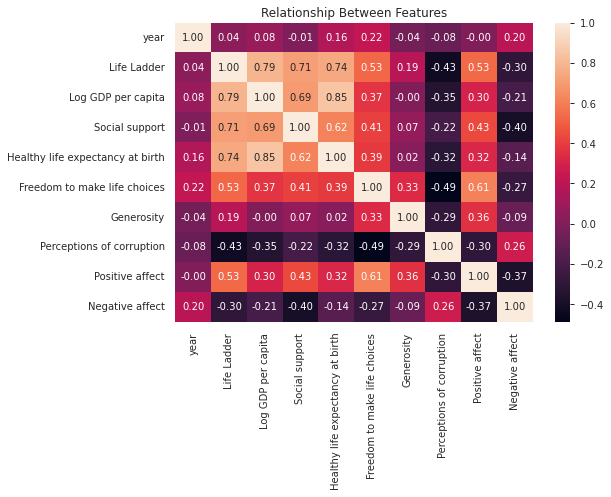

In [104]:
sns.heatmap(df.corr(),annot = True, fmt = ".2f");
plt.title("Relationship Between Features")

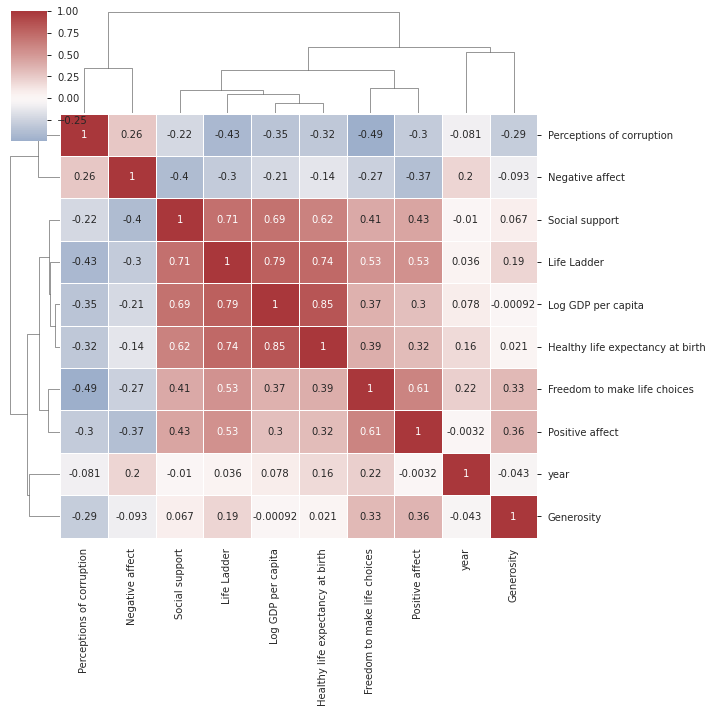

In [105]:
sns.clustermap(df.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1,0.2),annot = True, linewidths = .7, figsize = (10,10));

<a id = '15'></a>
## Conclusion

The first important thing about happiness is **'Log GDP per capita'**,
The second one is **'Healthy life expectancy at birth'**
Less important observation unit is **'Social Support'**.

When people ask that money does bring happiness, the answer is yes!